In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import math as math

In [2]:
DATA_DIR = 'MNIST'
STEPS = 1000
MINIBATCH_SIZE = 1000

imgDim = 28
imgChannels = 1

input_feature_width = imgDim * imgDim
number_of_outputs = input_feature_width
num_hidden_units = 2
learning_rate = 0.01

In [3]:
def get_data(mnist):
    batch = mnist.test.next_batch(1000)
    #print(batch[0].shape)
    #images = batch[0].reshape(1000, 784)
    return batch[0], batch[1]
    

In [4]:
X = tf.placeholder(tf.float32, shape=[None, input_feature_width])
hidden = tf.layers.dense(X, num_hidden_units)
output = tf.layers.dense(hidden, number_of_outputs)
reconstruction_loss = tf.reduce_mean(tf.square(output - X))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [5]:
init = tf.global_variables_initializer()

In [6]:
mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)
X_train, labels = get_data(mnist)
codings = hidden
reconstuction_loss_values = []

with tf.Session() as sess:
    init.run()
    for iteration in range(STEPS):
        training_op.run(feed_dict={X:X_train})
        reconstuction_loss_values.append(reconstruction_loss.eval(feed_dict={X:X_train}))
    codings_val = codings.eval(feed_dict={X:X_train})
    data = X_train[0].reshape(1,input_feature_width)
    codings_val1 = codings.eval(feed_dict={X:data})
    print(codings_val1)


Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
[[ 1.28144133  1.19248796]]


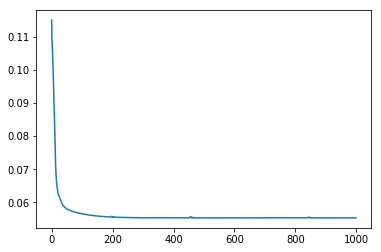

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(reconstuction_loss_values)


# Reconstruction loss plotted as above

In [ ]:
print(codings_val.shape)